# 1 - Perkenalan

**Bab pengenalan harus diisi dengan identitas.**

---------

**Hussein MS | Batch 10 | Phase 2**

------

# 2. Judul/Penanda Soal 

**Soal dan judul problem yang dikerjakan**

------

Objektif : 

+ memahami konsep Artificial Neural Network.
+ mempersiapkan data untuk digunakan dalam model Artificial Neural Network.
+ mengimplementasikan Artificial Neural Network dengan data yang diberikan.
+ menganalisis dan menjelaskan layer yang dibuat.

Problem : 

Customer attrition or customer churn occurs when customers or subscribers stop doing business with a company or service. Customer churn is a critical metric because it is much more cost effective to retain existing customers than it is to acquire new customers as it saves cost of sales and marketing. Customer retention is more cost-effective as you’ve already earned the trust and loyalty of existing customers.

**We hope that you could make a model, that could predict if Customer churn will occurs or not.**

------

# 3. Import Libraries

**Berisi semua library yang digunakan dalam project.**

---

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,accuracy_score, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTEN, SMOTE
import category_encoders as ce
import tensorflow as tf 
from scipy import stats

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


Import library yang dibutuhkan

# 4. Data Loading

**Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.**

---

In [4]:
pd.options.display.max_columns = None

untuk menunjukan semua kolom 

In [5]:
df = pd.read_csv('telcust.csv', na_values=' ')

Import dataset, kita set 'unknown' sebagai null values

In [6]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [7]:
df.shape

(7043, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Dataset yang diolah mempunyai bentuk ***7043 Baris dan 21 Kolom*** <br> 
Terdapat *missing value* pada dataset. handling *missing value* diperlukan pada tahap preprocessing

In [9]:
#cek sebarang missing value
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

banyaknya jumlah missing value pada tiap kolom

In [10]:
df_cop = df.copy()

membuat copy dataset yang nantinya akan digunakan dalam proses split train-set

In [11]:
df_cop1 = df_cop.copy()

copy lain dari dataset untuk EDA 

# 5. EDA 

**Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.**

----

In [12]:
df_cop1['TotalCharges'].astype(float)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [13]:
#kelompokkan data berdasarkan kemungkinan tipe datanya
num_eda = df_cop1.select_dtypes(include=np.number)
cat_eda = df_cop1.select_dtypes(include=[object])

In [14]:
cat_eda

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [15]:
cat_eda.drop(['customerID'], axis=1, inplace=True)

In [16]:
cat_eda

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [17]:
cat_eda1 = df_cop1[['gender','Partner','Dependents','PhoneService']]
cat_eda2 = df_cop1[['MultipleLines','InternetService','OnlineSecurity','OnlineBackup']]
cat_eda3 = df_cop1[['DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]
cat_eda4 = df_cop1[['Contract','PaperlessBilling','PaymentMethod','Churn']]

In [18]:
sns.set_style('whitegrid')

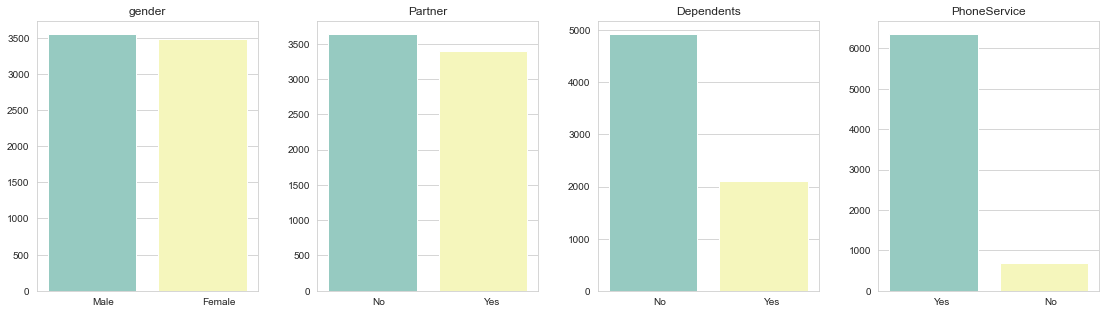

In [19]:
figeda1,axes1=plt.subplots(ncols=4,figsize=(16,5))

for i,col in enumerate(cat_eda1.columns):
    sns.barplot(x=cat_eda1[col].value_counts().index, y=cat_eda1[col].value_counts().values, ax=axes1[i])
    axes1[i].set_xticklabels(axes1[i].get_xticklabels(), ha='left')
    axes1[i].set_title(col)
figeda1.tight_layout(pad=3.0)

Kesimpulan berdasarkan Visualisasi Diatas : 
+ Banyak Customer yang datang untuk melakukan Service 
+ Banyak Customer yang memiliki tanggungan 
+ Sebaran Gender merata 
+ Lebih banyak Customer yang tidak memiliki Partner 

---

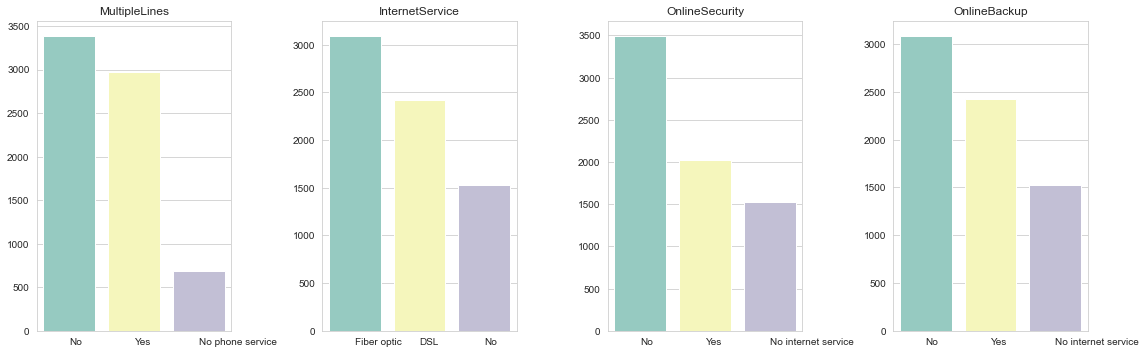

In [20]:
figeda2,axes2=plt.subplots(ncols=4,figsize=(16,5))

for i,col in enumerate(cat_eda2.columns):
    sns.barplot(x=cat_eda2[col].value_counts().index, y=cat_eda2[col].value_counts().values, ax=axes2[i])
    axes2[i].set_xticklabels(axes2[i].get_xticklabels(), ha='left')
    axes2[i].set_title(col)

figeda2.tight_layout(pad=1.0)

Kesimpulan berdasarkan Visualisasi Diatas : 
+ Banyak Customer yang hanya memiliki 1 jenis Phone Service 
+ Kebanyakan Customer memilih Fiber Optic sebagai Layanan Internet Service mereka 
+ Banyak Customer yang tidak memiliki Online Security 
+ Customer lebih Cenderung tidak menggunakan Online Backup 

___

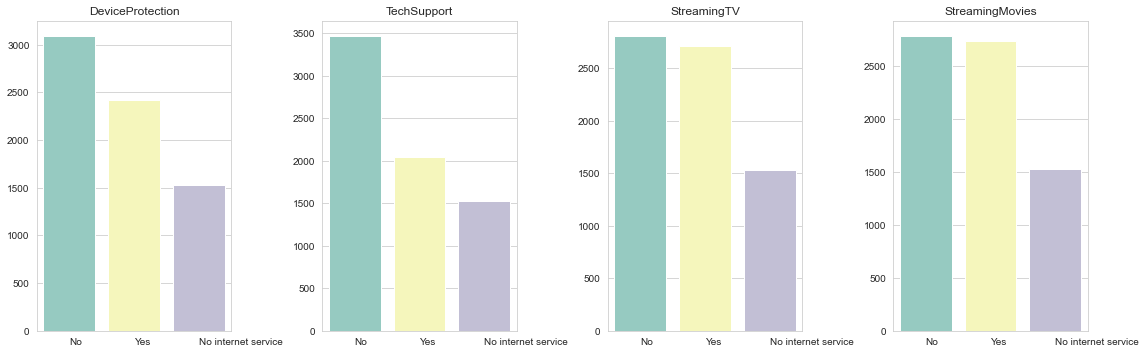

In [21]:
figeda3,axes3=plt.subplots(ncols=4,figsize=(16,5))

for i,col in enumerate(cat_eda3.columns):
    sns.barplot(x=cat_eda3[col].value_counts().index, y=cat_eda3[col].value_counts().values, ax=axes3[i])
    axes3[i].set_xticklabels(axes3[i].get_xticklabels(), ha='left')
    axes3[i].set_title(col)

figeda3.tight_layout(pad=1.0)

Kesimpulan berdasarkan Visualisasi Diatas : 
+ Lebih banyak Customer yang tidak menggunakan Device Protection dibandingkan yang menggunakan 
+ Customer lebih banyak tidak mengenali / mengetahui adanya Tech Support 
+ Persebaran antara Customer yang memiliki StreamingTV dan tidak cukup merata, artinya ada Customer yang menganggap penggunaan StreamingTV menjadi kebutuhan Primer mereka 
---

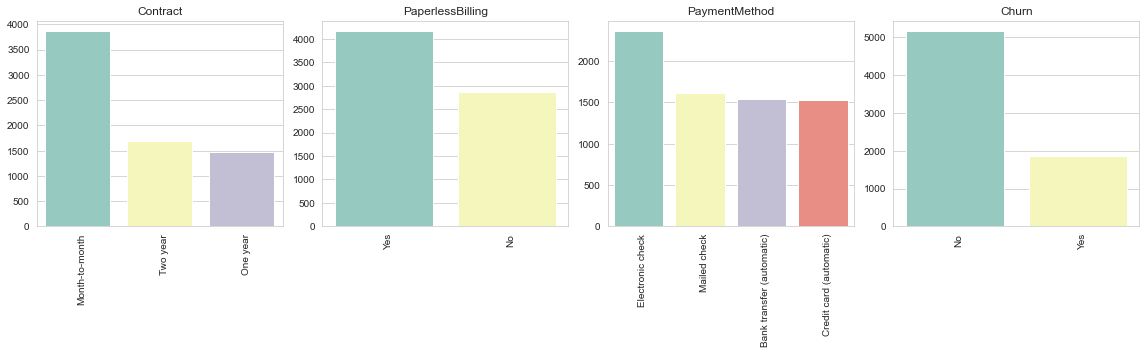

In [22]:
figeda4,axes4=plt.subplots(ncols=4,figsize=(16,5))

for i,col in enumerate(cat_eda4.columns):
    sns.barplot(x=cat_eda4[col].value_counts().index, y=cat_eda4[col].value_counts().values, ax=axes4[i])
    axes4[i].set_xticklabels(axes4[i].get_xticklabels(), ha='left',rotation=90)
    axes4[i].set_title(col)
figeda4.tight_layout(pad=1.0)

Kesimpulan berdasarkan Visualisasi Diatas : 
+ Customer lebih memilih Month to month subscription dibandingkan dengan bundle yang lain 
+ Lebih banyak Customer membayar secara Cashless 
+ Electronic Check menjadi metode pembayaran paling diminati 
+ Tidak banyak Customer yang Churn
____

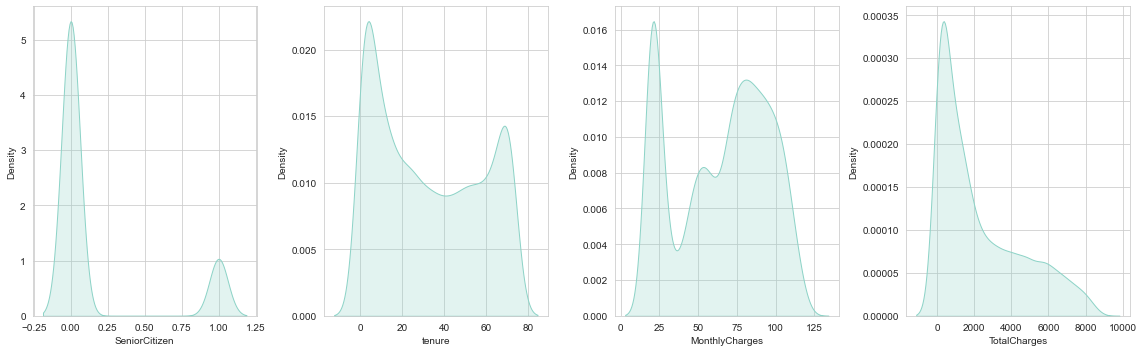

In [24]:
fignum, axen = plt.subplots(nrows=1, ncols=4, figsize=(16,5))
sns.kdeplot(data=num_eda,x='SeniorCitizen',fill=True,ax=axen[0])
sns.kdeplot(data=num_eda,x='tenure',fill=True,ax=axen[1])
sns.kdeplot(data=num_eda,x='MonthlyCharges',fill=True,ax=axen[2])
sns.kdeplot(data=num_eda,x='TotalCharges',fill=True,ax=axen[3])
plt.tight_layout()
plt.show()

Kesimpulan berdasarkan Visualisasi Diatas : 
+ Terdapat 2 Peak di kolom Tenure (Kolom Senior Citizen merupakan kategorikal nominal)
+ Kemugkinan Skew pada kolom Monthly Charges
+ Skew pada kolom total Charges

----

**Cek Central Tendency**

In [25]:
#kelompokkan data berdasarkan kemungkinan tipe datanya
num_ct = df_cop1.select_dtypes(include=np.number).columns.tolist()
cat_ct = df_cop1.select_dtypes(include=[object]).columns.tolist()

In [26]:
eda_mean = df_cop1[num_eda.columns].mean().rename('mean')
eda_median = df_cop1[num_eda.columns].median().rename('median')
eda_mode = df_cop1[cat_eda.columns].mode().iloc[0].rename('mode')

Membuat fungsi central tendency untuk dilihat distribusi datanya

----

In [27]:
#gabungkan fungsi yang telah dibuat ke satu satuan agar mudah dibaca
central_tendency = pd.concat([eda_mean, eda_median, eda_mode], axis=1)
central_tendency

,mean,median,mode
SeniorCitizen,0.162147,0.000,NaN
tenure,32.371149,29.000,NaN
MonthlyCharges,64.761692,70.350,NaN
TotalCharges,2283.300441,1397.475,NaN
gender,NaN,NaN,Male
Partner,NaN,NaN,No
Dependents,NaN,NaN,No
PhoneService,NaN,NaN,Yes
MultipleLines,NaN,NaN,No
InternetService,NaN,NaN,Fiber optic


In [28]:
df_cop1.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


----

In [29]:
corr_matrix = df_cop1.corr()

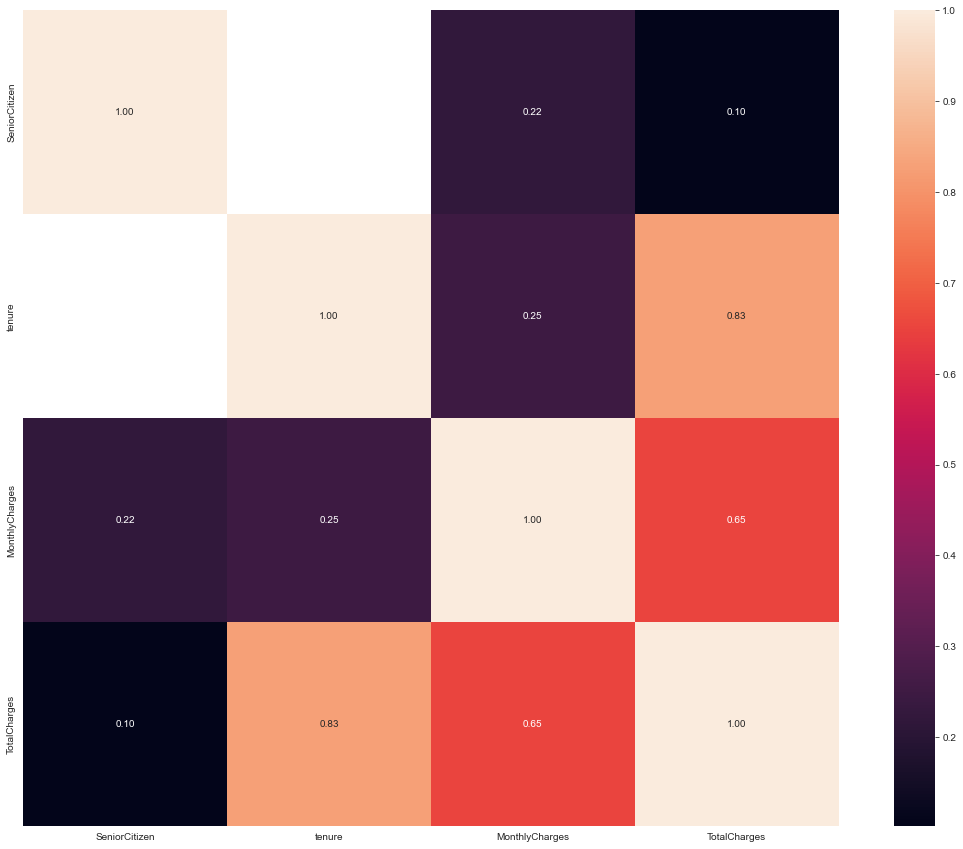

In [30]:
# corr_matrox.style.background_gradient(cmap='coolwarm')
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix[(corr_matrix >= 0.1) | (corr_matrix <= -0.1)], square=True, annot=True, fmt='.2f')
plt.show()

Membuat fungsi untuk cek korelasi tiap feature pada kolom numerik, ternyata kolom saling berkorelasi satu sama lain.

---

# 6. Data Preprocessing 

**Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test-inference, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.**

---

In [31]:
#membuat data khusus untuk menjadi model inference
data_inf = df_cop.sample(10, random_state=6)
data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4539,4355-HBJHH,Male,0,Yes,Yes,67,Yes,Yes,DSL,Yes,No,Yes,No,Yes,Yes,Two year,Yes,Electronic check,79.70,5293.40,Yes
1802,7492-TAFJD,Male,0,Yes,Yes,7,No,No phone service,DSL,Yes,Yes,Yes,No,No,No,Two year,No,Mailed check,38.55,280.00,No
1380,1131-SUEKT,Male,0,Yes,Yes,61,Yes,No,Fiber optic,No,Yes,No,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),98.45,6145.20,No
5305,9027-TMATR,Female,0,Yes,No,43,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,78.80,3460.30,No
1960,5846-QFDFI,Female,0,Yes,Yes,33,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),88.60,2888.70,No
2902,1658-TJVOA,Female,1,No,No,6,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.10,450.90,No
6252,9074-KGVOX,Male,0,Yes,Yes,50,No,No phone service,DSL,Yes,No,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),39.45,2021.35,No
3647,1016-DJTSV,Male,1,No,No,8,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.70,572.85,No
6410,6121-TNHBO,Female,1,No,No,63,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,One year,No,Bank transfer (automatic),83.00,5243.05,No
6812,6563-VNPMN,Female,1,No,No,45,Yes,No,Fiber optic,Yes,Yes,No,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),85.70,3778.10,No


Ambil record dari dataset yang akan digunakan sebagai model inference 

In [32]:
#drop index data inf dari dataset yang ada

data_train_test = df_cop.drop(data_inf.index)
data_train_test

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [33]:
#reset inde terhadap data train test

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4355-HBJHH,Male,0,Yes,Yes,67,Yes,Yes,DSL,Yes,No,Yes,No,Yes,Yes,Two year,Yes,Electronic check,79.70,5293.40,Yes
1,7492-TAFJD,Male,0,Yes,Yes,7,No,No phone service,DSL,Yes,Yes,Yes,No,No,No,Two year,No,Mailed check,38.55,280.00,No
2,1131-SUEKT,Male,0,Yes,Yes,61,Yes,No,Fiber optic,No,Yes,No,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),98.45,6145.20,No
3,9027-TMATR,Female,0,Yes,No,43,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,78.80,3460.30,No
4,5846-QFDFI,Female,0,Yes,Yes,33,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),88.60,2888.70,No
5,1658-TJVOA,Female,1,No,No,6,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.10,450.90,No
6,9074-KGVOX,Male,0,Yes,Yes,50,No,No phone service,DSL,Yes,No,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),39.45,2021.35,No
7,1016-DJTSV,Male,1,No,No,8,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.70,572.85,No
8,6121-TNHBO,Female,1,No,No,63,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,One year,No,Bank transfer (automatic),83.00,5243.05,No
9,6563-VNPMN,Female,1,No,No,45,Yes,No,Fiber optic,Yes,Yes,No,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),85.70,3778.10,No


In [34]:
# Split between X (features) and y (target)

X = data_train_test.drop('Churn', axis=1)
y = data_train_test['Churn']
X

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7028,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7029,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7030,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7031,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


**Split dataset**

*X merupakan feature yang akan kita gunakan untuk training (sebelum feature selection)*

*y merupakan target*

----

In [35]:
#split train-set dan test-set


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=93, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=93, stratify=y_train)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (5380, 20)
Test Size  :  (1055, 20)


Stratify akan membalance kan proporsi kelas yang diberikan. Misalnya, jika variabel y adalah variabel kategoris biner dengan nilai 0 dan 1, jika ada 25% dari 0 dan 75% dari 1, stratify akan memastikan bahwa pemisahan acak memiliki 25% yg 0 dan 75% yg 1.

----

## Data Outlier

In [36]:
num_train = X_train.select_dtypes(include=(np.number)).columns.to_list()
obj_train = X_train.select_dtypes(include=['object']).columns.to_list()

Kita akan kelompokan Train yang memiliki Numerik dan Objek sebagai tipe datanya

In [37]:
num_test = X_test.select_dtypes(include=(np.number)).columns.to_list()
obj_test = X_test.select_dtypes(include=['object']).columns.to_list()

Kita akan kelompokan Test yang memiliki Numerik dan Objek sebagai tipe datanya

In [38]:
def diagnostic_plots(df, column):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], bins=30, kde=True)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[column])
    plt.title('Boxplot')

    plt.show()
    

Membuat fungsi diagnostik visualisasi untuk melihat sebaran distribusi data

In [39]:
def distribution_features(X_train, columns):
    for column in columns:
        print(column)
        print('Skew:', X_train[column].skew())
        print()
        if X_train[column].skew() < 0.5 and X_train[column].skew() > -0.5:
            print('Kemungkinan data normal')
        elif X_train[column].skew() < -1 or X_train[column].skew() > 1:
            print('Highly Skewed')
        elif X_train[column].skew() >= -0.5 or X_train[column].skew() <= 0.5:
            print('moderately skewed')
        else:
            print('Skew is zero')
        diagnostic_plots(X_train, column)

Membuat fungsi untuk mengelompokan data yang distribusinya Skew, ataupun Normal

---

**Diagnostik Distribusi Data**

Kita akan lakukan cek distribusi data pada Train-set yang bertipe data Numerik

SeniorCitizen
Skew: 1.877820258467643

Highly Skewed


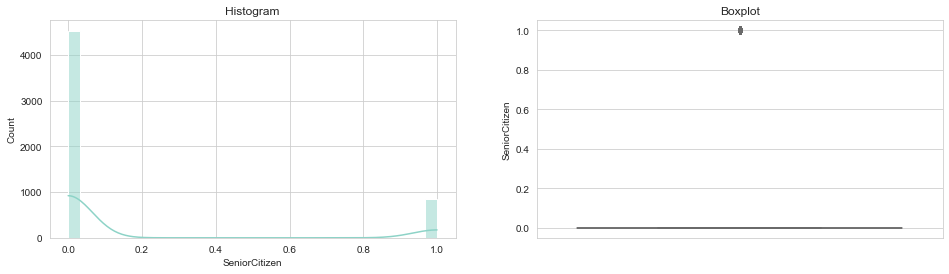

tenure
Skew: 0.23712707587834062

Kemungkinan data normal


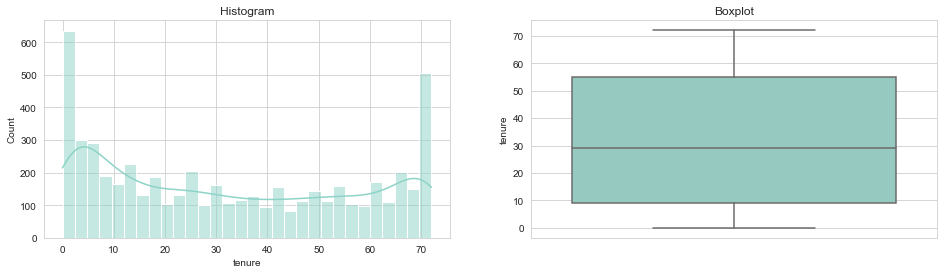

MonthlyCharges
Skew: -0.21433150855507274

Kemungkinan data normal


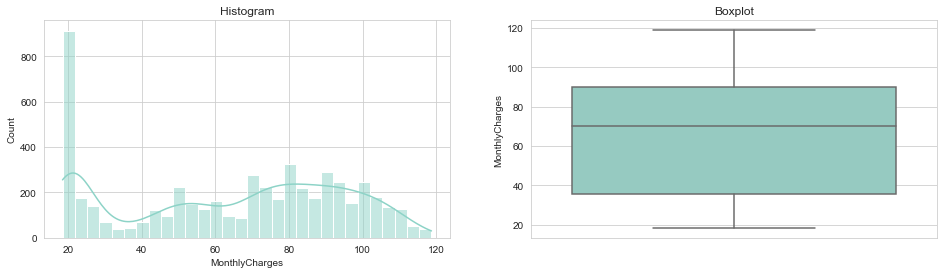

TotalCharges
Skew: 0.9758093983362002

moderately skewed


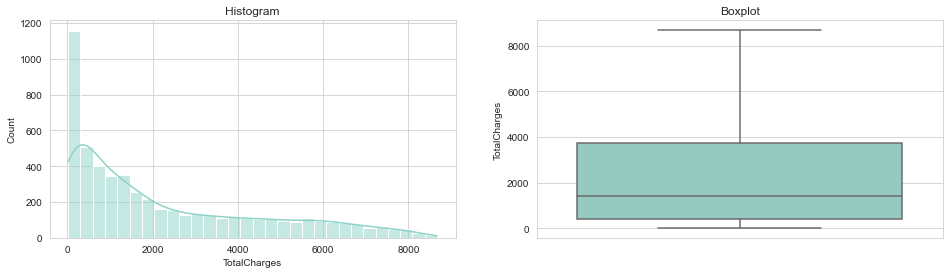

In [40]:
distribution_features(X_train, num_train)

Hasil yang didapat ternyata distribusi data dari datasetnya beragam. 

---

### Normal Distributed 

Cek outlier pada normal distributed data

In [41]:
def find_normal_boundaries(X_train, variable):
    upper_boundary = X_train[variable].mean() + 3 * X_train[variable].std()
    lower_boundary = X_train[variable].mean() - 3 * X_train[variable].std()
    
    return upper_boundary, lower_boundary

In [42]:
def norm_bound (X_train, column):
    upper_boundary, lower_boundary = find_normal_boundaries(X_train, column)
    

    print(upper_boundary, lower_boundary)
    print('(right end outliers) : {}'.format(len(X_train[X_train[column] > upper_boundary])))
    print('(left end outliers)  : {}'.format(len(X_train[X_train[column] < lower_boundary])))
    print('% of higher than upper : {}'.format(len(X_train[X_train[column] > upper_boundary]) / len(X_train) * 100))
    print('% of lower than lower : {}'.format(len(X_train[X_train[column] < lower_boundary]) / len(X_train) * 100))
    print('total outliers : {}'.format(len(X_train[X_train[column] > upper_boundary]) / len(X_train) * 100 + len(X_train[X_train[column] < lower_boundary]) / len(X_train) * 100))
    

Terdapat kolom yang memiliki distribusi Normal, namun setelah dilihat pada visualisasi boxplotnya, tidak terdapat outlier atau outliernya sedikit. maka dari itu kita akan abaikan handling pada normal distributed. 

---

### Skew Distributed

Cek distribusi skew outlier

In [43]:
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

karena terdapat kolom dengan tipe data kategorikal yang numerik atau nominal numerik. sehingga sebarannya tentu menyebabkan outlier pada dataset. Highly Skewed (postive, and negative)

Kita akan abaikan Outlier pada Num Train, terutama pada Total Charges. kita ingin semua value yang ada bisa menjadi bahan belajar untuk machine learning yang akan dibuat.

----

## Missing Value

**Kita akan bersihkan missing value dari data train-test set**

In [44]:
X_train.shape

(5380, 20)

In [45]:
y_train.shape

(5380,)

In [46]:
X_val.shape

(598, 20)

In [47]:
y_val.shape

(598,)

**Cek numerical missing value**

**Train set**

In [48]:
def missval (X_train, column):
    miss_val = X_train[column].isnull().sum()
    print(miss_val)
    print(' ')
    print('% of missing values :\n{}'.format(miss_val/len(X_train)*100))

In [49]:
missval(X_train, num_train)

SeniorCitizen     0
tenure            0
MonthlyCharges    0
TotalCharges      6
dtype: int64
 
% of missing values :
SeniorCitizen     0.000000
tenure            0.000000
MonthlyCharges    0.000000
TotalCharges      0.111524
dtype: float64


Kolom yang memiliki missing value pada dataset : 

TotalCharges, missing values sebesar **6** <br>



In [50]:
#drop missing value dari train set
X_train = pd.concat([X_train, y_train], axis=1, join='inner')
X_train = X_train.dropna()

y_train = X_train['Churn']
X_train = X_train.loc[:, X_train.columns != 'Churn']

In [51]:
missval(X_train, num_train)

SeniorCitizen     0
tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64
 
% of missing values :
SeniorCitizen     0.0
tenure            0.0
MonthlyCharges    0.0
TotalCharges      0.0
dtype: float64


---

**Val Set**

In [52]:
missval(X_val, num_train)

SeniorCitizen     0
tenure            0
MonthlyCharges    0
TotalCharges      1
dtype: int64
 
% of missing values :
SeniorCitizen     0.000000
tenure            0.000000
MonthlyCharges    0.000000
TotalCharges      0.167224
dtype: float64


Kolom yang memiliki missing value pada dataset : 

TotalCharges, missing values sebesar **1** <br>



In [53]:
#drop missing value dari train set
X_val = pd.concat([X_val, y_val], axis=1, join='inner')
X_val = X_val.dropna()

y_val = X_val['Churn']
X_val = X_val.loc[:, X_val.columns != 'Churn']

In [54]:
missval(X_val, num_train)

SeniorCitizen     0
tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64
 
% of missing values :
SeniorCitizen     0.0
tenure            0.0
MonthlyCharges    0.0
TotalCharges      0.0
dtype: float64


**Test Set**

In [55]:
missval(X_val, num_train)

SeniorCitizen     0
tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64
 
% of missing values :
SeniorCitizen     0.0
tenure            0.0
MonthlyCharges    0.0
TotalCharges      0.0
dtype: float64


Kolom yang memiliki missing value pada dataset : 

TotalCharges, missing values sebesar **1** <br>



In [56]:
#drop missing value dari train set
X_test = pd.concat([X_test, y_test], axis=1, join='inner')
X_test = X_test.dropna()

y_test = X_test['Churn']
X_test = X_test.loc[:, X_test.columns != 'Churn']

In [57]:
missval(X_test, num_train)

SeniorCitizen     0
tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64
 
% of missing values :
SeniorCitizen     0.0
tenure            0.0
MonthlyCharges    0.0
TotalCharges      0.0
dtype: float64


---

Karena missing value yang ada kolom default, lebih dari 5% dari total dataset yang ada. kita drop missing valuenya.

Data telah dibersihkan dan siap untuk diseleksi feature yang akan digunakan

---

## Feature Selection

**Pada tahapan ini kita akan pilih Feature yang akan dijadikan sebagai feature pembelajaran untuk model machine learning** 

---

Objek penyelesaian kasus ini adalah, dibuatnya model deep learning yang mampu memprediksi apakah seseorang akan berhenti berlangganan (pada bulan itu) atau tidak. Maka dari itu, Target feature yang akan kita gunakan pada kasus ini adalah **Churn**

---

In [58]:
X_train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6671,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85
2248,1399-UBQIU,Male,0,No,No,11,Yes,No,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,69.35,712.25
525,0750-EBAIU,Male,0,No,No,52,Yes,No,Fiber optic,Yes,No,Yes,No,Yes,No,One year,No,Electronic check,91.25,4738.30
3813,8819-ZBYNA,Female,0,Yes,No,58,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),109.10,6393.65
1585,3766-EJLFL,Female,0,Yes,Yes,68,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.05,7508.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2611,3351-NQLDI,Female,0,Yes,Yes,67,Yes,Yes,Fiber optic,Yes,No,No,Yes,No,Yes,One year,Yes,Credit card (automatic),94.35,6341.45
356,3351-NGXYI,Female,1,No,No,16,Yes,Yes,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,54.10,889.00
6291,9541-PWTWO,Female,0,No,No,52,Yes,Yes,DSL,No,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),80.95,4233.95
2999,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55


Kita akan drop customerID, karena customerID disini tidak merepresentasikan data apapun yang akan digunakan pada model

In [59]:
from sklearn.ensemble import RandomForestClassifier

**Feature Importance**

In [60]:
num_columns = X_train.select_dtypes(include=(np.number)).columns.to_list()

In [61]:
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=46)
rnd_clf.fit(X_train[num_columns], y_train)
for name, score in zip(X_train, rnd_clf.feature_importances_):
    print(name, score)

customerID 0.0253610621142416
gender 0.22500671067502162
SeniorCitizen 0.39176075913018316
Partner 0.3578714680805536


In [62]:
rnd_clf.feature_importances_

array([0.02536106, 0.22500671, 0.39176076, 0.35787147])

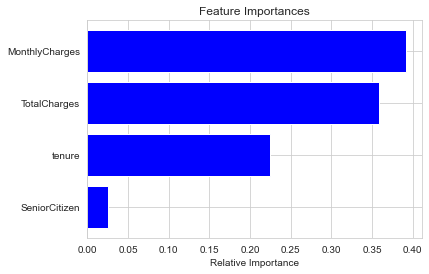

In [63]:
importances = rnd_clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [num_columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Jika dilihat berdasarkan feature importance, dapat diambil kesimpulan bahwa Monthly memiliki peranan penting terhadap prediksi 'Churn'. begitu juga dengan feature selanjutnya 

Disini jika dilihat, SeniorCitizen memiliki nilai Importance yang sangat rendah, dapat kita simpulkan bahwa, tidak akan kita gunakan feature tersebut. 

----

**Drop Feature yang tidak diperlukan**

In [64]:
X_train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6671,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85
2248,1399-UBQIU,Male,0,No,No,11,Yes,No,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,69.35,712.25
525,0750-EBAIU,Male,0,No,No,52,Yes,No,Fiber optic,Yes,No,Yes,No,Yes,No,One year,No,Electronic check,91.25,4738.30
3813,8819-ZBYNA,Female,0,Yes,No,58,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),109.10,6393.65
1585,3766-EJLFL,Female,0,Yes,Yes,68,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.05,7508.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2611,3351-NQLDI,Female,0,Yes,Yes,67,Yes,Yes,Fiber optic,Yes,No,No,Yes,No,Yes,One year,Yes,Credit card (automatic),94.35,6341.45
356,3351-NGXYI,Female,1,No,No,16,Yes,Yes,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,54.10,889.00
6291,9541-PWTWO,Female,0,No,No,52,Yes,Yes,DSL,No,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),80.95,4233.95
2999,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55


In [65]:
X_train = X_train.drop(['SeniorCitizen','customerID'] , axis=1)

In [66]:
X_test = X_test.drop(['SeniorCitizen','customerID'] , axis=1)

In [67]:
X_val = X_val.drop(['SeniorCitizen','customerID'] , axis=1)

Kita drop customerID karena feature tersebut tidak merepresentasikan maksud atau value apapun. 

---

## Feature Scalling

**Agar tidak bias model machine learning kita, maka kita lakukan feature scalling**

----

In [68]:
X_train

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6671,Female,No,Yes,48,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85
2248,Male,No,No,11,Yes,No,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,69.35,712.25
525,Male,No,No,52,Yes,No,Fiber optic,Yes,No,Yes,No,Yes,No,One year,No,Electronic check,91.25,4738.30
3813,Female,Yes,No,58,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),109.10,6393.65
1585,Female,Yes,Yes,68,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.05,7508.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2611,Female,Yes,Yes,67,Yes,Yes,Fiber optic,Yes,No,No,Yes,No,Yes,One year,Yes,Credit card (automatic),94.35,6341.45
356,Female,No,No,16,Yes,Yes,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,54.10,889.00
6291,Female,No,No,52,Yes,Yes,DSL,No,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),80.95,4233.95
2999,Male,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55


In [69]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
obj_columns = X_train.select_dtypes(include=['object']).columns.tolist()
ord_columns = X_train[['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']].columns.tolist()
ohe_col = X_train[['gender','InternetService','Contract','PaymentMethod']].columns.tolist()

In [70]:
X_train[obj_columns]

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
6671,Female,No,Yes,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,No,Two year,Yes,Mailed check
2248,Male,No,No,Yes,No,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
525,Male,No,No,Yes,No,Fiber optic,Yes,No,Yes,No,Yes,No,One year,No,Electronic check
3813,Female,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic)
1585,Female,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2611,Female,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,No,Yes,No,Yes,One year,Yes,Credit card (automatic)
356,Female,No,No,Yes,Yes,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check
6291,Female,No,No,Yes,Yes,DSL,No,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic)
2999,Male,No,Yes,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check


Kita akan pisahkan train test ke dalam masing masing fungsi variable. Numerik untuk data bertipe Numerik, dan Obj untuk data yang bertipe kategori Object 

---

In [71]:
# Feature Scaling using StandardScaler

scaler = StandardScaler()

train_num_scaled = scaler.fit_transform(X_train[num_columns])
# X_test_num_scaled = scaler.transform(X_test_num)

In [72]:
train_num_scaled

array([[ 0.63180955,  1.02928038,  1.0484874 ],
       [-0.8767432 ,  0.15935899, -0.69115852],
       [ 0.79489634,  0.88789736,  1.09755878],
       ...,
       [ 0.79489634,  0.54525146,  0.87348318],
       [-0.22439607,  0.4970149 , -0.03881352],
       [-0.79519981,  0.27412873, -0.59439305]])

In [73]:
X_train_num_scaled = pd.DataFrame(train_num_scaled, columns=num_columns)

In [74]:
X_train_num_scaled

,tenure,MonthlyCharges,TotalCharges
0,0.631810,1.029280,1.048487
1,-0.876743,0.159359,-0.691159
2,0.794896,0.887897,1.097559
3,1.039527,1.481706,1.833007
4,1.447243,1.480043,2.328342
...,...,...,...
5369,1.406472,0.991024,1.809816
5370,-0.672885,-0.347957,-0.612631
5371,0.794896,0.545251,0.873483
5372,-0.224396,0.497015,-0.038814


---

## Feature Encoding

----

In [75]:
# Feature Encoding using One hot encoding and Ordinal Encoder
encoder = OrdinalEncoder()
ohe = OneHotEncoder()

In [76]:
X_train_ohe = ohe.fit_transform(X_train[ohe_col]).toarray()
dfX_train_ohe = pd.DataFrame(X_train_ohe, columns=[str(i) for i in range(X_train_ohe.shape[1])])
dfX_train_ohe.columns = ohe.get_feature_names_out(ohe_col)
dfX_train_ohe

,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5369,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5370,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5371,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5372,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [77]:
ord_enc = encoder.fit_transform(X_train[ord_columns])
dfX_train_enc = pd.DataFrame(ord_enc, columns=ord_columns)
dfX_train_enc

,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling
0,0.0,1.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,1.0
2,0.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0
3,1.0,0.0,1.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,1.0
4,1.0,1.0,1.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5369,1.0,1.0,1.0,2.0,2.0,0.0,0.0,2.0,0.0,2.0,1.0
5370,0.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
5371,0.0,0.0,1.0,2.0,0.0,0.0,2.0,2.0,2.0,2.0,1.0
5372,0.0,1.0,1.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0


----

**Setelah kita Encoding semua feature kategorikal tadi, kita concate untuk menjadi 1 kesatuan DataFrame**

In [78]:
X_train_end = pd.concat([X_train_num_scaled,dfX_train_ohe, dfX_train_enc,], axis=1)
X_train_end

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling
0,0.631810,1.029280,1.048487,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,0.0,1.0
1,-0.876743,0.159359,-0.691159,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,1.0
2,0.794896,0.887897,1.097559,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0
3,1.039527,1.481706,1.833007,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,1.0
4,1.447243,1.480043,2.328342,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5369,1.406472,0.991024,1.809816,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,0.0,0.0,2.0,0.0,2.0,1.0
5370,-0.672885,-0.347957,-0.612631,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
5371,0.794896,0.545251,0.873483,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,2.0,2.0,2.0,1.0
5372,-0.224396,0.497015,-0.038814,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0


**Label Encoding**

In [79]:
encodl = LabelEncoder()

y_train = encodl.fit_transform(y_train)
y_train


array([1, 0, 0, ..., 0, 1, 0])

In [80]:

y_val = encodl.transform(y_val)
y_val

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,

In [81]:
y_test = encodl.transform(y_test)
y_test

array([0, 0, 0, ..., 0, 1, 0])

---

## SMOTE

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

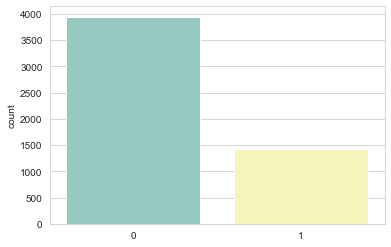

In [82]:
sns.countplot(y_train)

Jika kita lihat pada Label / Target Feature, data yang kita terima mengalami Imbalance (Jumlah Proporsi data yang berbeda jauh), ini bisa menyebabkan model yang akan kita gunakan mengalami Underfitting karena minimnya nilai untuk dipelajari, oleh karena itu, kita akan lakukan OverSampling terhadap Minority Valuenya. 

---

In [83]:
smote = SMOTE(k_neighbors=5, random_state=36)

In [84]:
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_end, y_train)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

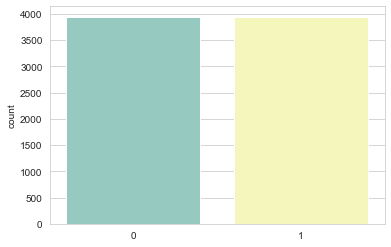

In [85]:
sns.countplot(y_train_balanced)

Jumlah Valuenya sudah terlihat sama.

In [86]:
X_train_balanced

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling
0,0.631810,1.029280,1.048487,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,1.000000,0.000000,1.0,1.0,0.0,0.0,2.0,2.0,2.00000,2.0,0.0,1.000000
1,-0.876743,0.159359,-0.691159,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,2.0,0.00000,2.0,2.0,1.000000
2,0.794896,0.887897,1.097559,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.0,1.0,0.0,2.0,0.0,2.0,0.00000,2.0,0.0,0.000000
3,1.039527,1.481706,1.833007,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.000000,0.000000,1.000000,0.0,1.0,2.0,2.0,2.0,0.0,2.00000,2.0,2.0,1.000000
4,1.447243,1.480043,2.328342,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.000000,0.000000,0.000000,1.000000,1.0,1.0,2.0,2.0,0.0,2.0,2.00000,2.0,2.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7885,-1.284460,-0.588072,-0.986772,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.47848,0.0,0.0,1.000000
7886,-0.886792,1.005777,-0.556244,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.0,1.0,2.0,0.0,2.0,2.0,0.00000,0.0,2.0,1.000000
7887,-1.267717,0.345000,-0.962452,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.410651,0.589349,0.410651,0.0,1.0,0.0,2.0,0.0,0.0,0.00000,0.0,0.0,0.410651
7888,-1.284460,-1.468505,-0.998531,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.686936,0.313064,0.000000,1.000000,1.0,1.0,0.0,1.0,1.0,1.0,1.00000,1.0,1.0,1.000000


---

## Pipeline (Preprocessing)

In [87]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pickle

In [88]:
num_column = X_train.select_dtypes(include=np.number).columns.tolist()
obj_column = X_train.select_dtypes(include=['object']).columns.tolist()

In [89]:
label_column = df_cop['Churn']

In [90]:
#deklarasi pipeline preprocessing

num_pipe = make_pipeline(SimpleImputer(strategy='constant', fill_value=0), StandardScaler())
ord_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'), OrdinalEncoder())
ohe_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())


dtprep = ColumnTransformer(transformers=[('nume', num_pipe, num_columns), ('ord', ord_pipe, ord_columns), ('ohe', ohe_pipe, ohe_col)])

dtprep_final = make_pipeline(dtprep)

In [91]:
dtprep.fit_transform(X_train)

array([[ 0.63180955,  1.02928038,  1.0484874 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.8767432 ,  0.15935899, -0.69115852, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.79489634,  0.88789736,  1.09755878, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.79489634,  0.54525146,  0.87348318, ...,  0.        ,
         0.        ,  0.        ],
       [-0.22439607,  0.4970149 , -0.03881352, ...,  0.        ,
         1.        ,  0.        ],
       [-0.79519981,  0.27412873, -0.59439305, ...,  0.        ,
         1.        ,  0.        ]])

In [92]:
#ekstraksi fitur

X_val = dtprep.transform(X_val)
X_test = dtprep.transform(X_test)

In [93]:
X_train_balanced.shape

(7890, 26)

In [94]:
X_val.shape

(597, 26)

In [95]:
X_test.shape

(1051, 26)

In [96]:
#save model 
with open("prepro_pipe.pkl", "wb") as f:
    pickle.dump(dtprep_final, f)

---

## PIPELINE Tensor

In [97]:
X_train = X_train_balanced.to_numpy()

In [98]:
train_set = tf.data.Dataset.from_tensor_slices((X_train, y_train_balanced)).shuffle(1000).batch(12).repeat(5)
val_set = tf.data.Dataset.from_tensor_slices((X_val, y_val)).shuffle(1000).batch(12).repeat(5)

In [99]:
test_set = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [100]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 7. Model Definition

**Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.**

----

### **Deklarasi Model** 

#### **Base Model**

**Sequential Api**

In [101]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import keras

In [102]:
#architecture neural network

model = Sequential()

model.add(Dense(64, input_shape=(26,), activation='relu' ))#input layer
model.add(Dense(32, activation='relu'))#hidden layer 1
model.add(Dense(1, activation='sigmoid'))#output layer

#compile 
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

#train
history = model.fit(train_set, epochs=50, validation_data=(val_set))


Epoch 1/50
3290/3290 [==============================] - 14s 4ms/step - loss: 0.3703 - accuracy: 0.8337 - val_loss: 0.7200 - val_accuracy: 0.6633
Epoch 2/50
3290/3290 [==============================] - 10s 3ms/step - loss: 0.3537 - accuracy: 0.8412 - val_loss: 0.8133 - val_accuracy: 0.6281
Epoch 3/50
3290/3290 [==============================] - 11s 3ms/step - loss: 0.3334 - accuracy: 0.8514 - val_loss: 0.7556 - val_accuracy: 0.6650
Epoch 4/50
3290/3290 [==============================] - 12s 4ms/step - loss: 0.3105 - accuracy: 0.8645 - val_loss: 0.8255 - val_accuracy: 0.6633
Epoch 5/50
3290/3290 [==============================] - 10s 3ms/step - loss: 0.2894 - accuracy: 0.8750 - val_loss: 0.9103 - val_accuracy: 0.6750
Epoch 6/50
3290/3290 [==============================] - 10s 3ms/step - loss: 0.2696 - accuracy: 0.8850 - val_loss: 1.0901 - val_accuracy: 0.6600
Epoch 7/50
3290/3290 [==============================] - 12s 4ms/step - loss: 0.2532 - accuracy: 0.8923 - val_loss: 1.1760 - val_ac

In [103]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1728      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,841
Trainable params: 3,841
Non-trainable params: 0
_________________________________________________________________


**Functional Api**

In [104]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

In [105]:
#arsitektur model NN
data_in = Input(shape=(26,))

hidden_1 = Dense(64, activation='relu')(data_in)
output = Dense(1, activation='sigmoid')(hidden_1)

model2 = Model(inputs=data_in, outputs=output)

#compile 
model2.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

#train
histo = model2.fit(train_set, epochs=50, validation_data=(val_set))


Epoch 1/50
3290/3290 [==============================] - 10s 3ms/step - loss: 0.3772 - accuracy: 0.8293 - val_loss: 0.7274 - val_accuracy: 0.6315
Epoch 2/50
3290/3290 [==============================] - 10s 3ms/step - loss: 0.3639 - accuracy: 0.8367 - val_loss: 0.6469 - val_accuracy: 0.6851
Epoch 3/50
3290/3290 [==============================] - 10s 3ms/step - loss: 0.3556 - accuracy: 0.8413 - val_loss: 0.6389 - val_accuracy: 0.6951
Epoch 4/50
3290/3290 [==============================] - 10s 3ms/step - loss: 0.3446 - accuracy: 0.8457 - val_loss: 0.6568 - val_accuracy: 0.6884
Epoch 5/50
3290/3290 [==============================] - 10s 3ms/step - loss: 0.3394 - accuracy: 0.8498 - val_loss: 0.6361 - val_accuracy: 0.7018
Epoch 6/50
3290/3290 [==============================] - 10s 3ms/step - loss: 0.3291 - accuracy: 0.8547 - val_loss: 0.6326 - val_accuracy: 0.7085
Epoch 7/50
3290/3290 [==============================] - 10s 3ms/step - loss: 0.3231 - accuracy: 0.8569 - val_loss: 0.6755 - val_ac

In [106]:
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 26)]              0         
                                                                 
 dense_3 (Dense)             (None, 64)                1728      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,793
Trainable params: 1,793
Non-trainable params: 0
_________________________________________________________________


---

#### **Model Improvement**

**Sequential API**

In [107]:
from tensorflow.keras import initializers
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization


In [108]:
model_imp = Sequential()

model_imp.add(Dense(64,input_shape=(26,) ,kernel_initializer=initializers.RandomUniform, kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4) ,activation='relu'))#input layer
model_imp.add(BatchNormalization())
model_imp.add(Dropout(0.25))
model_imp.add(Dense(32, kernel_initializer=initializers.RandomUniform,activation='relu'))#hidden layer 2
model_imp.add(BatchNormalization())
model_imp.add(Dropout(0.25))
model_imp.add(Dense(1, activation='sigmoid'))#output layer


#compile 
model_imp.compile(loss='binary_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])

#train
history_imp = model_imp.fit(train_set, batch_size=12 , validation_data=(val_set),epochs=50)

Epoch 1/50
3290/3290 [==============================] - 20s 6ms/step - loss: 0.5951 - accuracy: 0.7211 - val_loss: 0.5524 - val_accuracy: 0.7236
Epoch 2/50
3290/3290 [==============================] - 19s 6ms/step - loss: 0.5768 - accuracy: 0.7306 - val_loss: 0.6243 - val_accuracy: 0.6817
Epoch 3/50
3290/3290 [==============================] - 19s 6ms/step - loss: 0.5780 - accuracy: 0.7277 - val_loss: 0.7057 - val_accuracy: 0.6415
Epoch 4/50
3290/3290 [==============================] - 19s 6ms/step - loss: 0.5835 - accuracy: 0.7329 - val_loss: 0.6460 - val_accuracy: 0.6868
Epoch 5/50
3290/3290 [==============================] - 19s 6ms/step - loss: 0.5800 - accuracy: 0.7384 - val_loss: 0.9169 - val_accuracy: 0.6114
Epoch 6/50
3290/3290 [==============================] - 19s 6ms/step - loss: 0.5777 - accuracy: 0.7341 - val_loss: 0.7590 - val_accuracy: 0.6516
Epoch 7/50
3290/3290 [==============================] - 19s 6ms/step - loss: 0.5708 - accuracy: 0.7392 - val_loss: 0.7200 - val_ac

In [109]:
model_imp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                1728      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 32)               

**Functional API**

In [110]:
#arsitektur model NN

data_drop = Dropout(0.25)(data_in)

hiddenimp_1 = Dense(64,kernel_initializer=initializers.Orthogonal, kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),activation='relu')(data_drop)
hidden_drop1 = Dropout(0.25)(hiddenimp_1)

outputimp = Dense(1, activation='sigmoid')(hidden_drop1)

model_imp2 = Model(inputs=data_in, outputs=outputimp)

#cmopile
model_imp2.compile(loss='binary_crossentropy',
                   optimizer=tf.optimizers.Adam(learning_rate=0.0001),
                   metrics=['accuracy'])

#train 
histo_imp2 = model_imp2.fit(train_set, validation_data=(val_set),steps_per_epoch=len(train_set),epochs=50)

Epoch 1/50
3290/3290 [==============================] - 12s 4ms/step - loss: 0.5370 - accuracy: 0.7393 - val_loss: 0.6120 - val_accuracy: 0.6717
Epoch 2/50
3290/3290 [==============================] - 11s 3ms/step - loss: 0.5091 - accuracy: 0.7576 - val_loss: 0.5343 - val_accuracy: 0.7487
Epoch 3/50
3290/3290 [==============================] - 11s 3ms/step - loss: 0.5028 - accuracy: 0.7618 - val_loss: 0.5069 - val_accuracy: 0.7638
Epoch 4/50
3290/3290 [==============================] - 11s 3ms/step - loss: 0.5001 - accuracy: 0.7604 - val_loss: 0.4998 - val_accuracy: 0.7621
Epoch 5/50
3290/3290 [==============================] - 11s 3ms/step - loss: 0.4981 - accuracy: 0.7647 - val_loss: 0.4957 - val_accuracy: 0.7739
Epoch 6/50
3290/3290 [==============================] - 11s 3ms/step - loss: 0.4959 - accuracy: 0.7645 - val_loss: 0.4952 - val_accuracy: 0.7688
Epoch 7/50
3290/3290 [==============================] - 11s 3ms/step - loss: 0.4936 - accuracy: 0.7654 - val_loss: 0.4972 - val_ac

In [111]:
model_imp2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 26)]              0         
                                                                 
 dropout_2 (Dropout)         (None, 26)                0         
                                                                 
 dense_8 (Dense)             (None, 64)                1728      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,793
Trainable params: 1,793
Non-trainable params: 0
_________________________________________________________________


# 8. Model Evaluation

**Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.**

### **Model Before Improvement**

**Sequential API**

In [112]:
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.370301,0.833688,0.720040,0.663317
1,0.353740,0.841191,0.813322,0.628141
2,0.333434,0.851356,0.755610,0.664992
3,0.310521,0.864512,0.825472,0.663317
4,0.289372,0.875006,0.910307,0.675042
5,0.269582,0.884968,1.090089,0.659967
6,0.253215,0.892319,1.176026,0.661642
7,0.237969,0.900406,1.180510,0.700167
8,0.223972,0.904487,1.372226,0.681742
9,0.209398,0.912421,1.521982,0.686767


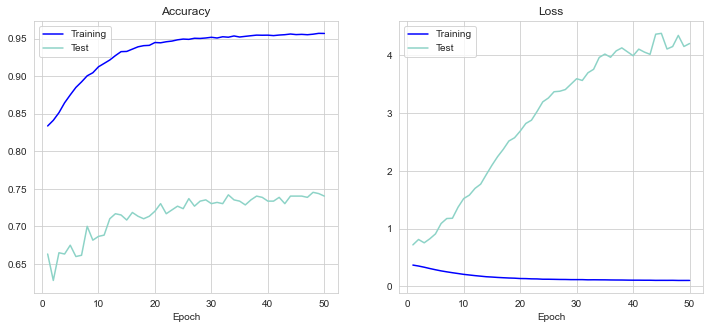

In [113]:
figh,axh=plt.subplots(ncols=2,figsize=(12,5))
epochs=len(history.history['accuracy'])
axh[0].plot(range(1,epochs+1),history.history['accuracy'],label='Training', color='blue')
axh[0].plot(range(1,epochs+1),history.history['val_accuracy'],label='Test')
axh[0].set_title('Accuracy')
axh[0].set_xlabel('Epoch')
axh[0].legend()

axh[1].plot(range(1,epochs+1),history.history['loss'],label='Training', color='blue')
axh[1].plot(range(1,epochs+1),history.history['val_loss'],label='Test')
axh[1].set_title('Loss')
axh[1].set_xlabel('Epoch')
axh[1].legend()

Kesimpulan yang bisa kita ambil : 

+ Dari hasil Akurasi serta Lossnya,Model yang kita buat, ternyata mengalami overfitting. terbukti dari naiknya Loss

---

**Functional API**

In [114]:
metrics2 = pd.DataFrame(histo.history)
metrics2 

,loss,accuracy,val_loss,val_accuracy
0,0.377243,0.829278,0.727410,0.631491
1,0.363851,0.836705,0.646861,0.685092
2,0.355614,0.841293,0.638853,0.695142
3,0.344575,0.845703,0.656788,0.688442
4,0.339413,0.849835,0.636135,0.701843
5,0.329066,0.854651,0.632579,0.708543
6,0.323103,0.856882,0.675531,0.710218
7,0.315000,0.860963,0.691274,0.737018
8,0.307434,0.865678,0.717506,0.742044
9,0.301396,0.868162,0.768908,0.738693


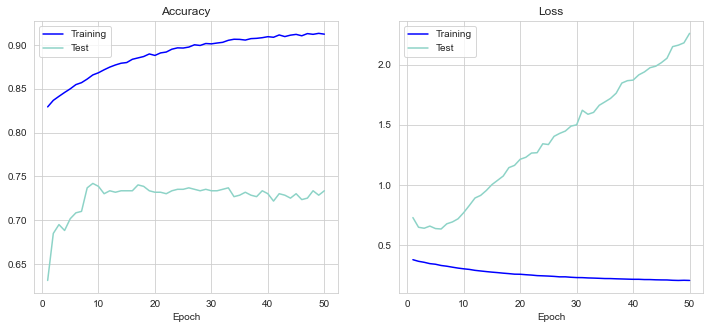

In [115]:
figf,axf=plt.subplots(ncols=2,figsize=(12,5))
epochs=len(histo.history['accuracy'])
axf[0].plot(range(1,epochs+1),histo.history['accuracy'],label='Training', color='blue')
axf[0].plot(range(1,epochs+1),histo.history['val_accuracy'],label='Test')
axf[0].set_title('Accuracy')
axf[0].set_xlabel('Epoch')
axf[0].legend()

axf[1].plot(range(1,epochs+1),histo.history['loss'],label='Training', color='blue')
axf[1].plot(range(1,epochs+1),histo.history['val_loss'],label='Test')
axf[1].set_title('Loss')
axf[1].set_xlabel('Epoch')
axf[1].legend()

Kesimpulan yang bisa kita ambil : 
 
+ Model yang kita buat, ternyata mengalami overfitting. 

---

### **Model After Improvement**

**Sequential API**

In [116]:
metrics_imp = pd.DataFrame(history_imp.history)
metrics_imp

,loss,accuracy,val_loss,val_accuracy
0,0.595106,0.721115,0.552410,0.723618
1,0.576848,0.730596,0.624285,0.681742
2,0.578030,0.727681,0.705726,0.641541
3,0.583527,0.732877,0.645993,0.686767
4,0.579999,0.738352,0.916861,0.611390
5,0.577683,0.734094,0.759008,0.651591
6,0.570790,0.739240,0.719956,0.639866
7,0.557959,0.744537,0.755849,0.649916
8,0.554684,0.746869,0.919554,0.643216
9,0.544783,0.751711,1.518042,0.649916


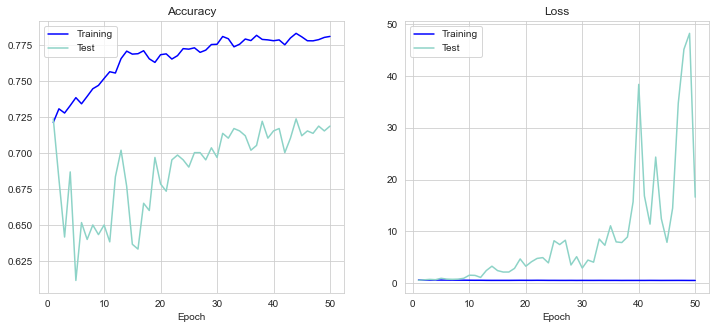

In [117]:
figimp,aximp=plt.subplots(ncols=2,figsize=(12,5))
epochs=len(history_imp.history['accuracy'])
aximp[0].plot(range(1,epochs+1),history_imp.history['accuracy'],label='Training', color='blue')
aximp[0].plot(range(1,epochs+1),history_imp.history['val_accuracy'],label='Test')
aximp[0].set_title('Accuracy')
aximp[0].set_xlabel('Epoch')
aximp[0].legend()

aximp[1].plot(range(1,epochs+1),history_imp.history['loss'],label='Training', color='blue')
aximp[1].plot(range(1,epochs+1),history_imp.history['val_loss'],label='Test')
aximp[1].set_title('Loss')
aximp[1].set_xlabel('Epoch')
aximp[1].legend()

Setelah dilakukan Improvement, ternyata Kita mengalami masalah Exploding Gradient.

----

**Functional API**

In [118]:
metrics_imp2 = pd.DataFrame(histo_imp2.history)
metrics_imp2

,loss,accuracy,val_loss,val_accuracy
0,0.537024,0.739341,0.612024,0.671692
1,0.509064,0.757592,0.534256,0.748744
2,0.502753,0.761825,0.506918,0.763819
3,0.500098,0.760431,0.499811,0.762144
4,0.498073,0.764740,0.495704,0.773869
5,0.495947,0.764461,0.495205,0.768844
6,0.493590,0.765399,0.497233,0.773869
7,0.493984,0.764411,0.496182,0.773869
8,0.491669,0.767630,0.496218,0.773869
9,0.490130,0.767909,0.498349,0.775544


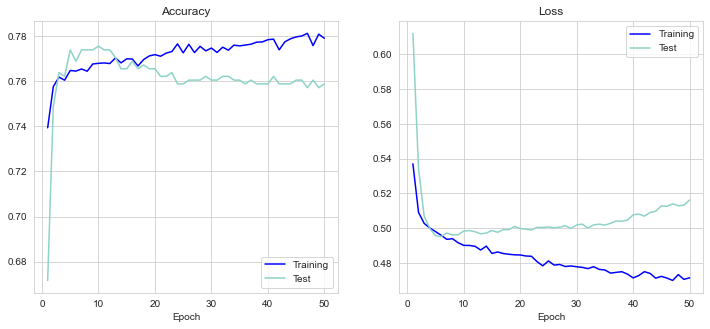

In [119]:
figf2,axf2=plt.subplots(ncols=2,figsize=(12,5))
epochs=len(histo_imp2.history['accuracy'])
axf2[0].plot(range(1,epochs+1),histo_imp2.history['accuracy'],label='Training', color='blue')
axf2[0].plot(range(1,epochs+1),histo_imp2.history['val_accuracy'],label='Test')
axf2[0].set_title('Accuracy')
axf2[0].set_xlabel('Epoch')
axf2[0].legend()

axf2[1].plot(range(1,epochs+1),histo_imp2.history['loss'],label='Training', color='blue')
axf2[1].plot(range(1,epochs+1),histo_imp2.history['val_loss'],label='Test')
axf2[1].set_title('Loss')
axf2[1].set_xlabel('Epoch')
axf2[1].legend()

Model dari Functional API, terlihat lebih menjanjikan meskipun nilai lossnya naik dan akurasinya menurun. Dari visualisasi Gradientnya, tidak terlihat masalah seperti Vanishing, maupun Exploding Gradient.

---

**Save Model**

In [120]:
model_imp2.save('model_fix.h5')

Dari hasil Uji Coba Functional Dan Sequential API. kita pilih model Functional API setelah Improvement karena, model ini menawarkan Masalah yang lebih sedikit dibandingkan dengan model lainnya yang telah dibuat. 

---

# 10. Model Inference 

**Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.**

----

In [121]:
from tensorflow.keras.models import load_model

In [122]:
model_inf = load_model('model_fix.h5')

In [123]:
res_model = model_inf.predict(X_test)

33/33 [==============================] - 0s 2ms/step


In [124]:
np.array(y_test)

array([0, 0, 0, ..., 0, 1, 0])

In [125]:
test_pred = np.where(res_model>=0.5,1,0)

In [126]:
X_train_end

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling
0,0.631810,1.029280,1.048487,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,0.0,1.0
1,-0.876743,0.159359,-0.691159,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,1.0
2,0.794896,0.887897,1.097559,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0
3,1.039527,1.481706,1.833007,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,1.0
4,1.447243,1.480043,2.328342,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5369,1.406472,0.991024,1.809816,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,0.0,0.0,2.0,0.0,2.0,1.0
5370,-0.672885,-0.347957,-0.612631,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
5371,0.794896,0.545251,0.873483,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,2.0,2.0,2.0,1.0
5372,-0.224396,0.497015,-0.038814,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0


In [127]:
df_test_set = pd.DataFrame(X_test, columns=X_train_end.columns)
df_test_set

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling
0,-0.142853,-1.470704,-0.733321,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.264864,1.193950,0.681441,0.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,2.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.795200,-1.505634,-0.883512,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.632113,0.974391,-0.285348,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-1.243688,0.502005,-0.939759,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,-1.284460,1.260483,-0.962084,1.0,1.0,1.0,2.0,2.0,0.0,2.0,0.0,2.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1047,-0.917515,-0.342967,-0.748582,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1048,-0.591341,-0.474370,-0.601835,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1049,-1.284460,0.377255,-0.973880,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [128]:
df_ytest = pd.DataFrame(y_test, columns=['Churn'])

In [129]:
df_test = pd.DataFrame(test_pred, columns=['Prediction - Churn'])
df_test

,Prediction - Churn
0,0
1,0
2,0
3,0
4,1
...,...
1046,0
1047,0
1048,1
1049,0


In [130]:
df_final_test = pd.concat([df_test_set,df_ytest,df_test], axis=1)
df_final_test

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn,Prediction - Churn
0,-0.142853,-1.470704,-0.733321,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
1,0.264864,1.193950,0.681441,0.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,2.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
2,-0.795200,-1.505634,-0.883512,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0
3,-0.632113,0.974391,-0.285348,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0
4,-1.243688,0.502005,-0.939759,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,-1.284460,1.260483,-0.962084,1.0,1.0,1.0,2.0,2.0,0.0,2.0,0.0,2.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0
1047,-0.917515,-0.342967,-0.748582,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
1048,-0.591341,-0.474370,-0.601835,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1
1049,-1.284460,0.377255,-0.973880,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0


----

In [131]:
keras.backend.clear_session()

# 11. Pengambilan Kesimpulan

**Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.**

----

Melalui percobaan yang dilakukan dengan berbagai macam Algortma Machine Learning dibawah ini merupakan hasil perbandingan Akurasi dari model yang telah dibuat: 

**Before Tunning**

Sequential API
			
+ Nilai Loss sebesar : **0.104488**
+ Nilai Akurasi : **0.956781**
+ Nilai Validasi Loss : **4.204898**
+ Nilai Validasi Akurasi : **0.740368**

Functional API

+ Nilai Loss sebesar : **0.204872**
+ Nilai Akurasi : **0.912142**
+ Nilai Validasi Loss : **2.259369**
+ Nilai Validasi Akurasi : **0.733668**

**After Tunning**

Sequential API

+ Nilai Loss sebesar : **0.505460**
+ Nilai Akurasi : **0.780887**
+ Nilai Validasi Loss : **16.598198**
+ Nilai Validasi Akurasi : **0.718593**

Functional API

+ Nilai Loss sebesar : **0.471475**
+ Nilai Akurasi : **0.779011**
+ Nilai Validasi Loss : **0.516204** 
+ Nilai Validasi Akurasi : **0.758794**

Rata - Rata Model memiliki Nilai Training Akurasi yang Cukup tinggi sebelum ditunning, tetapi jika dilihat perbedaan antara validasi akurasi dan Training Akurasinya model ini mengalami overfitting. 

Diantara percobaan terhadap ke-empat model yang telah dibuat, hasil akurasi tertinggi ada pada Functional API setelah di Tunning. maka dari itu, kita akan gunakan model ini pada tahap deployment, meskipun. Nilai Lossnya terus meningkat. Asumsi, masalah ini tidak akan dibesarkan karena Nilai AKurasinya yang juga terus membaik. 

### After Word

Karena data yang kita olah imbalance (Class 0 serta Class 1 yang memiliki perbedaan jumlah yang cukup jauh) mungkin mempengaruhi hasil dari Akurasi. Jika kita apply SMOTE pada training, Algoritma Machine Learning yang digunakan mampu memperbaiki prediksi pada class 1. 
Selain itu, Akurasi sendiri dapat dipengaruhi oleh proses preprocessing. Apakah metode yang digunakan tepat, sesuai dengan kebutuhan dari Dataset. Kemungkinan dapat terjadi Kesalahan pada proses preprocessing yang menyebabkan rendahnya nilai akurasi.  

---